In [2]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble 
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

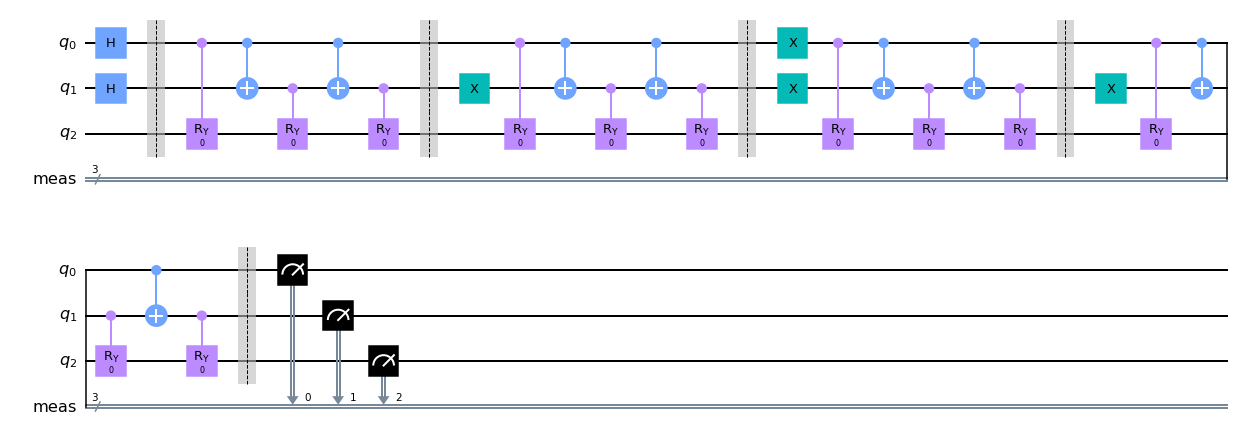

In [3]:
theta = 0 # because using the gray scale picture of 2X2 image
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'001': 1038, '010': 992, '000': 1063, '011': 1003}


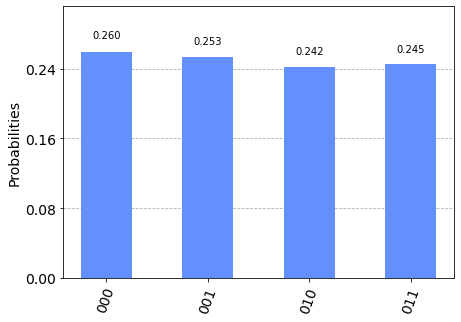

In [4]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [5]:
# BB84 --> Quantum Key distribution 

from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np 


mentee_bits = [0,0,0,0,0,1,0,1,0,0,1,1]
l = len(mentee_bits)
print(mentee_bits)
print(l)

mentee_bases = randint(2, size=l)
print(mentee_bases)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
12
[1 1 0 1 0 0 0 1 1 1 0 0]


In [6]:
# 1 means prepare in x basis 
# 0 means prepare in z basis

def encode_message(bits, bases):
    message = []
    for i in range(l):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0:
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else:  # Preparing for x basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

message = encode_message(mentee_bits, mentee_bases)

In [7]:
print('bit = %i' % mentee_bits[0])
print('basis = %i' % mentee_bases[0])

bit = 0
basis = 1


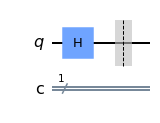

In [8]:
message[0].draw()

bit = 0
basis = 0


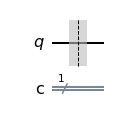

In [9]:
print('bit = %i' % mentee_bits[4])
print('basis = %i' % mentee_bases[4])
message[4].draw()

In [10]:
mentor_bases = randint(2, size=l)
print(mentor_bases)

[0 1 0 1 0 0 1 1 1 0 1 1]


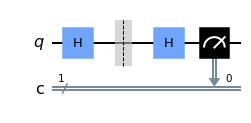

In [11]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(l):
        if bases[q] == 0:
            message[q].measure(0,0) # Measuring in z basis
        if bases[q] == 1:
            message[q].h(0)
            message[q].measure(0,0) # Measuring in X basis
        aer_sim =  Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements
        
mentor_result = measure_message(message, mentee_bases)
message[0].draw()

In [12]:
print(mentor_result)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]


In [13]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(l):
        if a_bases[q] == b_bases[q]:
            # if both basis are same then add it to good bits
            good_bits.append(bits[q])
    return good_bits        

In [14]:
mentee_key = remove_garbage(mentee_bases, mentor_bases, mentee_bits)
mentor_key = remove_garbage(mentee_bases, mentor_bases, mentor_result)
print(mentee_key)
print(mentor_key)

[0, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 1, 0]


In [15]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample    

In [16]:
sample_size = 15
bit_selection =  randint(l, size=sample_size)
print(bit_selection)

[10  8  0  7  7  9  9  9 11 10  8  2  5  7 11]


In [57]:

mentor_sample = sample_bits(mentor_key, bit_selection)
print(" mentor_sample = " + str(mentor_sample))
mentee_sample = sample_bits(mentee_key, bit_selection)
print(" mentee_sample = " + str(mentee_sample))


Traceback (most recent call last):
  Input In [57] in <cell line: 1>
    mentor_sample = sample_bits(mentor_key, bit_selection)
  Input In [42] in sample_bits
    sample.append(bits.pop(i))
IndexError: pop from empty list

Use %tb to get the full traceback.


/tmp/ipykernel_59/2454054445.py:4: RuntimeWarning: divide by zero encountered in remainder
  i = np.mod(i, len(bits))
